# HW#7 RNN

안녕하세요, 광운대학교 로봇학부의 오정현 교수입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1) 참고

이번 과제는 딥러닝의 대표적인 구조인 Recurrent Neural Network (RNN)을 이용하여 주가 예측을 해보도록 하겠습니다. 이번 과제를 통해 부자가 되는 길(?)을 찾으면 좋겠네요.

#1. Data Import
Data는 finance-datareader를 통해서 가져올 수 있습니다. yahoo finance에서 제공하는 api를 확인 후 종목을 입력하면 해당 데이터를 불러옵니다. https://finance.yahoo.com/에 접속 후 상단에서 Finace를 선택한 후 원하는 종목을 검색하면 종목 코드를 알 수 있습니다. 종목 코드와 데이터를 가져올 시작 날짜와 끝 날짜를 입력하면 주가에 대한 데이터를 가져올 수 있습니다. 이 데이터는 `fdr.DataReader("종목코드", start="시작날짜", end ="끝날짜")` 함수를 통해 가져올 수 있습니다.

예시) naver 주식(035420.KS) 2000년 1월 1일부터 2010년 12월 31일까지 주가 정보 함수

fdr.DataReader("035420", start = "2000-01-01", end = "2010-12-31")

finace-datareader를 이용하기 위해서는 라이브러리를 다운 받아야 합니다. 아래의 코드를 실행해 다운받으면 됩니다. 

In [1]:
# !pip install -U finance-datareader

다운이 완료되면 DataReader를 통해서 dataset을 생성하겠습니다. naver 주식 2000년 1월 1일부터 2010년 12월 31일까지 주가를 학습데이터로 활용하고 2011년 1월 1일부터 2020년 5월 31일까지 주가를 테스트데이터로 활용해 봅시다.

In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import pandas_datareader as pdr
# from datetime import datetime
# from sklearn.preprocessing import MinMaxScaler
# import FinanceDataReader as fdr

# ### START CODE HERE ###
# df_train = fdr.DataReader("035420", start='2000-01-01', end='2010-12-31')
# df_test = fdr.DataReader("035420", start='2011-01-01', end='2020-05-31')
# ### END CODE HERE ###

# training_set = df_train.iloc[:, 3:4].values
# test_set = df_test.iloc[:, 3:4].values

# # assert training_set.shape == (2767,1)
# # assert test_set.shape == (2618,1)

training data와 test data를 출력해보겠습니다.


In [3]:
# plt.rcParams["figure.figsize"] = (10,8)
# plt.subplot(2, 1, 1)
# plt.plot(training_set)
# plt.title("Training Data")
# plt.ylabel('price($)')

# plt.subplot(2, 1, 2)
# plt.plot(test_set)
# plt.title("Test Data")
# plt.xlabel('time')
# plt.ylabel('price($)')

학습을 위하여 데이터를 0에서 1 사이의 값으로 scaling 해주도록 하겠습니다. 아래 코드를 실행하면 y축 값이 0에서 1 사이의 값으로 바뀌었음을 확인할 수 있습니다.

In [4]:
# sc1 = MinMaxScaler(feature_range=(0,1))
# training_set_scaled = sc1.fit_transform(training_set)
# sc2 = MinMaxScaler(feature_range=(0,1))
# test_set_scaled = sc2.fit_transform(test_set)

# plt.rcParams["figure.figsize"] = (10,8)
# plt.subplot(2, 1, 1)
# plt.plot(training_set_scaled)
# plt.title("Training Data")
# plt.ylabel('scaled price($)')

# plt.subplot(2, 1, 2)
# plt.plot(test_set_scaled)
# plt.title("Test Data")
# plt.xlabel('time')
# plt.ylabel('scaled price($)')

이제 학습을 위해 데이터를 일정한 길이의 sequence로 나누도록 하겠습니다. 아래 코드를 통해 길이가 60인 sequence들로 이루어진 X와 그때의 데이터값 Y로 X_train, Y_train, X_test, Y_test 만들 수 있습니다.

In [5]:
# X_train = []
# Y_train = []
# for i in range(60, training_set_scaled.shape[0]):
#     X_train.append(training_set_scaled[i-60:i, 0])
#     Y_train.append(training_set_scaled[i, 0])
# X_train, Y_train = np.array(X_train), np.array(Y_train)
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# X_test = []
# Y_test = []
# for i in range(60, test_set_scaled.shape[0]):
#     X_test.append(test_set_scaled[i-60:i, 0])
#     Y_test.append(test_set_scaled[i, 0])
# X_test, Y_test = np.array(X_test), np.array(Y_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 2. Simple RNN

이제 RNN 모델을 만들기 위해서 LSTM을 사용하겠습니다. LSTM 한개의 층을 이용해 간단한 모델을 생성해 보겠습니다. 

LSTM은 인자로 

units = (output의 shape을 결정)

Input_shape = (input의 형태를 결정)

return_sequences = (output의 형태를 최종출력과 시퀸스 중 선택)

 아래와 같이 레이어를 구성해 보세요.

| Layer (type) | Output Shape | Param # |
|------|------|------|
| LSTM | (None, 5) | 480 |
| Dense | (None, 1) | 11 |

In [6]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout

# model_LSTM = Sequential()

# model_LSTM.add(LSTM(5, input_shape = (60,1), return_sequences=False))
# model_LSTM.add(Dense(1))

# model_LSTM.summary()

아래와 같은 조건은로 학습을 시작합니다.

In [7]:
# model_LSTM.compile(optimizer = 'adam', loss = 'mean_squared_error')
# model_LSTM.fit(X_train, Y_train, epochs = 10, batch_size = 128)

In [8]:
# predicted_X_train = model_LSTM.predict(X_train)
# predicted_X_train = sc1.inverse_transform(predicted_X_train)

# predcited_X_test = model_LSTM.predict(X_test)
# predcited_X_test = sc2.inverse_transform(predcited_X_test)

# mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
# mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


# print("평균 training error:", mean_train_error)
# print("평균 test error:",mean_test_error)

In [9]:
# plt.subplot(2, 1, 1)
# plt.plot(training_set[59:-1,:], color = 'blue', label = 'GroundTruth')
# plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
# plt.title('Naver Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# plt.subplot(2, 1, 2)
# plt.plot(test_set[59:-1,:], color = 'blue', label = 'GroundTruth')
# plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
# plt.title('Naver Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

수행 결과 예측은 성공했으나 실제 그래프인 파란색 선을 제대로 따라가지 못하는 것을 확인했습니다.

# 3. RNN model

이제 더 깊은 RNN 모델을 만들어보도록 하겠습니다. 아래 모델과 같이 레이어를 구성해 보세요.

| Layer (type) | Output Shape | Param # |
|------|------|------|
| LSTM | (None, 60, 50) | 10400 |
| Dropout | (None, 60, 50) | 0 |
| LSTM | (None, 60, 50) | 20200 |
| Dropout | (None, 60, 50) | 0 |
| LSTM | (None, 60, 50) | 20200 |
| Dropout | (None, 60, 50) | 0 |
| LSTM | (None, 50) | 20200 |
| Dropout | (None, 50) | 0 |
| Dense | (None, 1) | 51 |


In [10]:
# model = Sequential()
# ### START CODE HERE ###
# model.add(LSTM(50, input_shape = (60,1), return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(50, input_shape = (60,1), return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(50, input_shape = (60,1), return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(50, input_shape = (60,1), return_sequences=False))
# model.add(Dropout(0.5))
# model.add(Dense(1))
# ### END CODE HERE ###

# model.summary()

학습을 시작합니다.

In [11]:
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# model.fit(X_train, Y_train, epochs = 10, batch_size = 128)

이제 training data의 prediction 결과와 test data의 prediction 결과를 살펴보겠습니다.

In [12]:
# predicted_X_train = model.predict(X_train)
# predicted_X_train = sc1.inverse_transform(predicted_X_train)

# predcited_X_test = model.predict(X_test)
# predcited_X_test = sc2.inverse_transform(predcited_X_test)

# mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
# mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


# print("평균 training error:", mean_train_error)
# print("평균 test error:",mean_test_error)

In [13]:
# plt.subplot(2, 1, 1)
# plt.plot(training_set[59:-1,:], color = 'blue', label = 'GroundTruth')
# plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
# plt.title('Naver Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# plt.subplot(2, 1, 2)
# plt.plot(test_set[59:-1,:], color = 'blue', label = 'GroundTruth')
# plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
# plt.title('Naver Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

수행결과 첫번째 모델보다 더 좋은 성능을 보이는 것을 확인했습니다.

# 4. Model save, Load
완성된 모델을 저장하고 불러와서 결과를 확인하는 방법을 보겠습니다. 사용되는 명령어는 save, load_model입니다.

In [14]:
# from google.colab import drive
# drive.mount('/content/drive')
# ! pwd

In [15]:
# import tensorflow as tf
# from keras.models import save_model, load_model

# model.save('drive/MyDrive/Recent_model.h5')

In [16]:
# recent_model = load_model('drive/MyDrive/Recent_model.h5')

# predicted_X_train = recent_model.predict(X_train)
# predicted_X_train = sc1.inverse_transform(predicted_X_train)

# predcited_X_test = recent_model.predict(X_test)
# predcited_X_test = sc2.inverse_transform(predcited_X_test)

# mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
# mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


# print("평균 training error:", mean_train_error)
# print("평균 test error:",mean_test_error)

In [17]:
# plt.subplot(2, 1, 1)
# plt.plot(training_set[59:-1,:], color = 'blue', label = 'GroundTruth')
# plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
# plt.title('Naver Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

# plt.subplot(2, 1, 2)
# plt.plot(test_set[59:-1,:], color = 'blue', label = 'GroundTruth')
# plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
# plt.title('Naver Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Price')
# plt.legend()
# plt.show()

기존 모델인 model과 불러온 모델 recent_model이 동일한 것을 확인할 수 있었습니다.

# 5. Test Problem

Problem: 이번에는 종목을 바꿔서 KODEX 인버스(종목코드 114800) 주식 2010년 1월 1일부터 2015년 12월 31일까지 주가를 학습데이터로 활용하고 2016년 1월 1일부터 2020년 5월 22일까지 주가를 테스트데이터로 활용해서 주가를 예측해 보세요. 이번 과제는 얼마나 잘 예측하는지 랭킹을 매겨서 공개할 예정입니다. 여러분만의 획기적인 주가 예측 모델을 기대해 봅니다.

여러분들의 모델을 평가하기 위해서 생성한 모델을 "이름_학번.h5"로 저장해주세요. 과제를 제출하실 때는 현재 코드를 작성한 "이름_학번.ipynb" , 보고서, "이름_학번.h5"를 압축해서 "이름_학번.zip"로 업로드 해주시길 바랍니다.

파일의 용량이 너무 큰 경우 kwbnoa123@naver.com으로 보내주시면 됩니다.

In [18]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import FinanceDataReader as fdr

df_train = fdr.DataReader("114800", start='2010-01-01', end='2015-12-31')
df_test = fdr.DataReader("114800", start='2016-01-01', end='2020-05-22')

training_set = df_train.iloc[:, 3:4].values
test_set = df_test.iloc[:, 3:4].values

In [20]:
print(training_set.shape)
print(test_set.shape)

(1487, 1)
(1075, 1)


Text(0, 0.5, 'price($)')

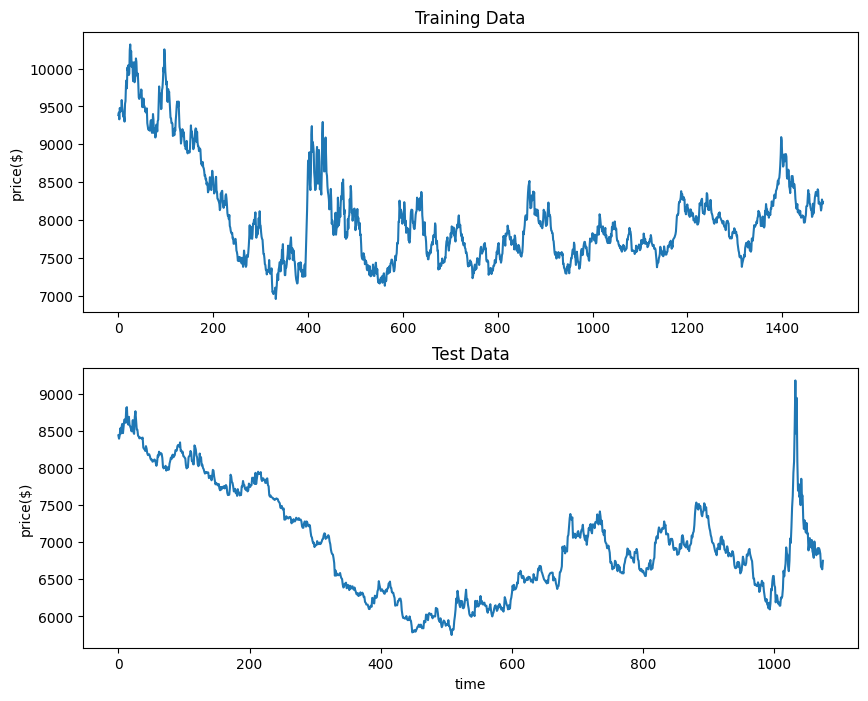

In [21]:
plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(2, 1, 1)
plt.plot(training_set)
plt.title("Training Data")
plt.ylabel('price($)')

plt.subplot(2, 1, 2)
plt.plot(test_set)
plt.title("Test Data")
plt.xlabel('time')
plt.ylabel('price($)')

Text(0, 0.5, 'scaled price($)')

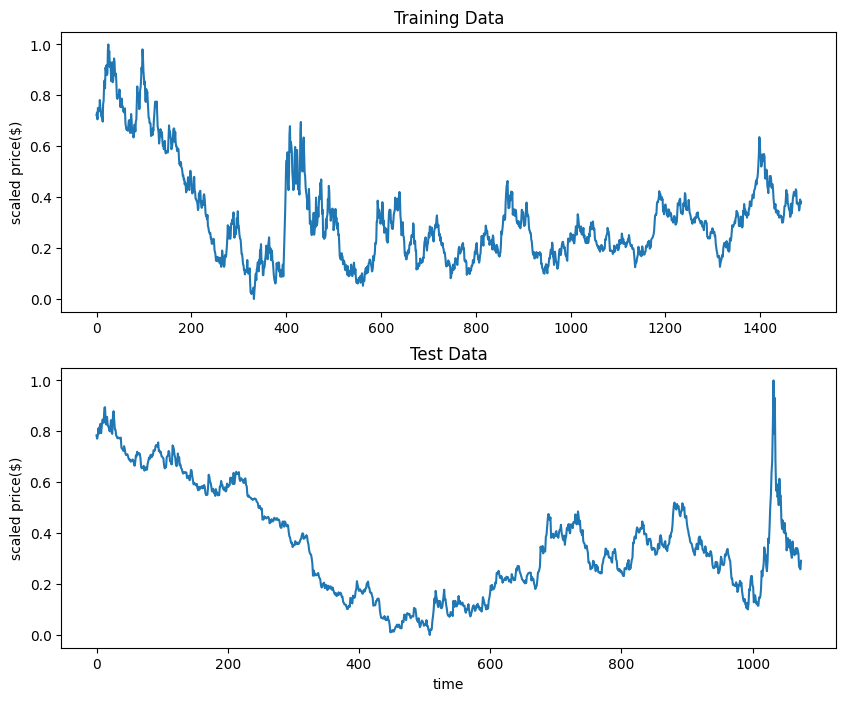

In [22]:
sc1 = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc1.fit_transform(training_set)
sc2 = MinMaxScaler(feature_range=(0,1))
test_set_scaled = sc2.fit_transform(test_set)

plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(2, 1, 1)
plt.plot(training_set_scaled)
plt.title("Training Data")
plt.ylabel('scaled price($)')

plt.subplot(2, 1, 2)
plt.plot(test_set_scaled)
plt.title("Test Data")
plt.xlabel('time')
plt.ylabel('scaled price($)')

In [23]:
X_train = []
Y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
Y_test = []
for i in range(60, test_set_scaled.shape[0]):
    X_test.append(test_set_scaled[i-60:i, 0])
    Y_test.append(test_set_scaled[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
print(X_train.shape)
print(Y_train.shape)

(1427, 60, 1)
(1427,)


In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU
from keras import layers

model = Sequential()

model.add(GRU(50, input_shape = (60,1), return_sequences=True))
model.add(GRU(50, input_shape = (60,1), return_sequences=True))
model.add(GRU(50, input_shape = (60,1), return_sequences=True))
model.add(GRU(50, input_shape = (60,1), return_sequences=True))
model.add(GRU(50, input_shape = (60,1), return_sequences=True))
model.add(GRU(50, input_shape = (60,1), return_sequences=True))
model.add(GRU(50, input_shape = (60,1), return_sequences=False))

model.add(Dropout(0.3))

model.add(Dense(10))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 gru_2 (GRU)                 (None, 60, 50)            15300     
                                                                 
 gru_3 (GRU)                 (None, 60, 50)            15300     
                                                                 
 gru_4 (GRU)                 (None, 60, 50)            15300     
                                                                 
 gru_5 (GRU)                 (None, 60, 50)            15300     
                                                                 
 gru_6 (GRU)                 (None, 50)                1

In [26]:
import tensorflow as tf

model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber())
model.fit(X_train, Y_train, epochs = 250, batch_size = 64)

Epoch 1/250
23/23 [==============================] - 19s 23ms/step - loss: 0.0104
Epoch 2/250
23/23 [==============================] - 0s 19ms/step - loss: 0.0030
Epoch 3/250
23/23 [==============================] - 0s 19ms/step - loss: 0.0025
Epoch 4/250
23/23 [==============================] - 0s 19ms/step - loss: 0.0023
Epoch 5/250
23/23 [==============================] - 0s 19ms/step - loss: 0.0022
Epoch 6/250
23/23 [==============================] - 0s 20ms/step - loss: 0.0020
Epoch 7/250
23/23 [==============================] - 1s 22ms/step - loss: 0.0018
Epoch 8/250
23/23 [==============================] - 1s 22ms/step - loss: 0.0017
Epoch 9/250
23/23 [==============================] - 1s 22ms/step - loss: 0.0018
Epoch 10/250
23/23 [==============================] - 0s 21ms/step - loss: 0.0016
Epoch 11/250
23/23 [==============================] - 0s 19ms/step - loss: 0.0014
Epoch 12/250
23/23 [==============================] - 0s 19ms/step - loss: 0.0014
Epoch 13/250
23/23 [====

In [27]:
predicted_X_train = model.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = model.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

32/32 [==============================] - 0s 8ms/step
평균 training error: 24.817938501883322
평균 test error: 26.476394608220442


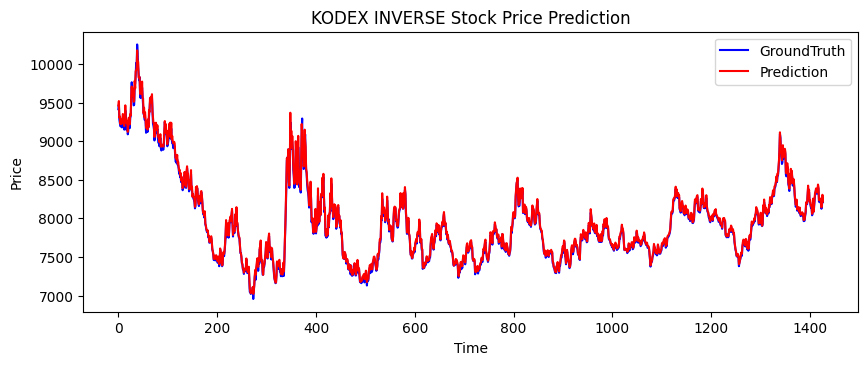

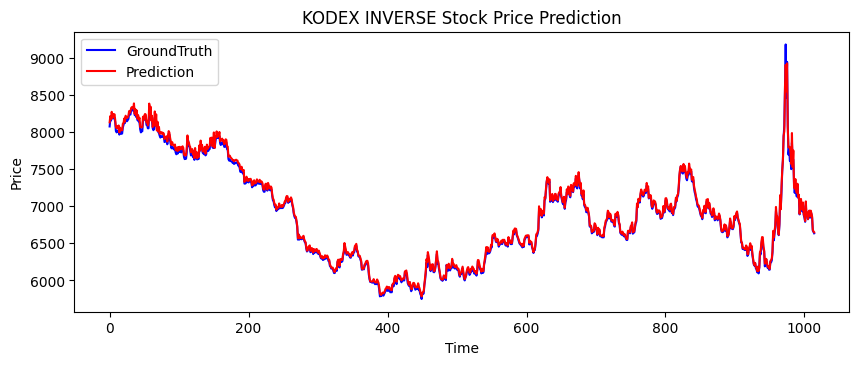

In [28]:
plt.subplot(2, 1, 1)
plt.plot(training_set[59:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
plt.title('KODEX INVERSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(test_set[59:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
plt.title('KODEX INVERSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
from google.colab import drive
drive.mount('/content/drive')
! pwd

Mounted at /content/drive
/content


In [30]:
# import tensorflow as tf
# from keras.models import save_model

# model.save('drive/MyDrive/한준호_2018741035.h5')

In [31]:
from keras.models import load_model

recent_model = load_model('drive/MyDrive/한준호_2018741035.h5')

predicted_X_train = recent_model.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = recent_model.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[59:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[59:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

32/32 [==============================] - 0s 8ms/step
평균 training error: 14.886941162622636
평균 test error: 12.58853765778941


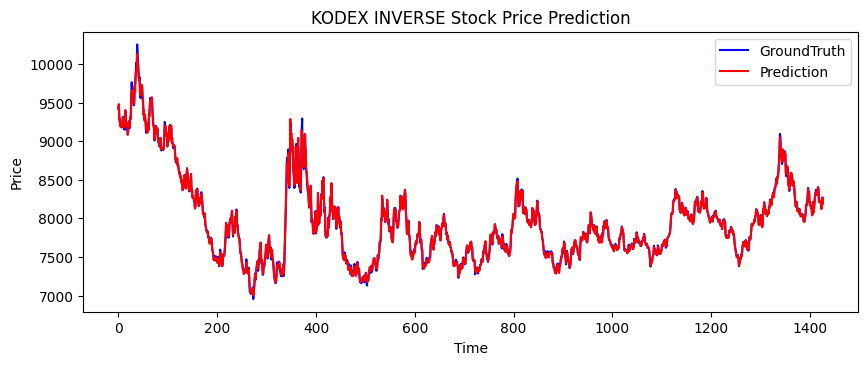

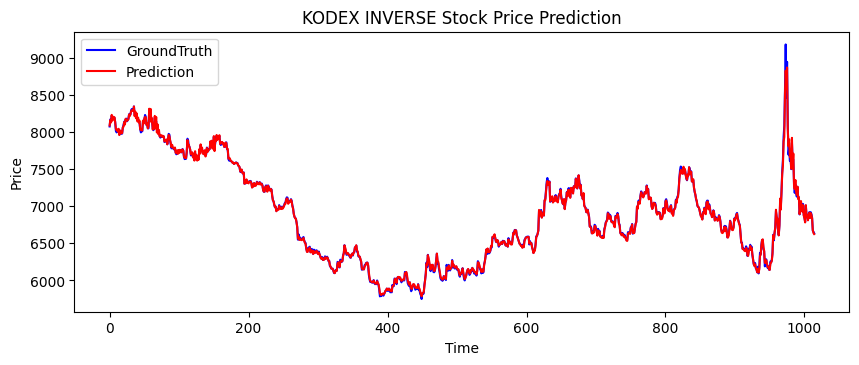

In [32]:
plt.subplot(2, 1, 1)
plt.plot(training_set[59:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
plt.title('KODEX INVERSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(test_set[59:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
plt.title('KODEX INVERSE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()